# ***``Image Processing with Python``***
#### ***``From basics to advance``***
---


## $$ ** Contents ** $$

1. [Image Processing Python packages](#Python_Image_Processing_packages)
2. [Pillow](#Pillow)
    1. [Reading an Image](#PIL_Read_image)
3. [Skimage](#Image_processing_using_skimage)
    1. [Read and Print](#Reading_and_Printing_an_image_using_scikit_image)
    2. [Some basic operations](#Manipulating_image)
        1. [How to convert an image to floating array?](#Converting_Image_to_Float)
        2. [How to convert an image to float64 array?](#Converting_Image_to_Float64)
        3. [How to reduce the contrast of an float image array?](#Reducing_the_float_image_contrast)
        4. [How to reduce the contrast of an float64 image array?](#Reducing_the_float64_image_contrast)
        5. [What happens if we add some random numbers to our float image array?](#Adding_Random_numbers_in_float_image)
        6. [What happens if we add some random numbers to our UInt image array?](#Adding_Random_numbers_in_uint_image)
        7. [How you can replace some pixels or portion of an image with a solid color box?](#Replace_image_area_with_solid_box_color)
        8. [How you can plot the subportion or subsample of an image?](#Plot_Subportion_or_subsample_of_an_image)
        9. [How you can faltten the image as 1-D array?](#Flatten_the_image_to_view_the_pixels)
        10. [How you fetch the RGB values of the pixels from an image?](#Storing_the_RGB_values_of_every_pixel_into_DataFrame)
        
---

##### ***Python_Image_Processing_packages***

In [1]:
import skimage
import cv2

##### ***Child Attributes of skimage***

In [2]:
dir(skimage)

['_INPLACE_MSG',
 '_STANDARD_MSG',
 '__SKIMAGE_SETUP__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 '_raise_build_error',
 '_shared',
 'color',
 'data',
 'data_dir',
 'draw',
 'dtype_limits',
 'ensure_python_version',
 'exposure',
 'external',
 'filters',
 'img_as_bool',
 'img_as_float',
 'img_as_float32',
 'img_as_float64',
 'img_as_int',
 'img_as_ubyte',
 'img_as_uint',
 'io',
 'lookfor',
 'measure',
 'restoration',
 'transform',
 'util']

##### ***Child Attributes of skimage.io***

In [3]:
from skimage import io

In [4]:
dir(io)

['ImageCollection',
 'MultiImage',
 'WRAP_LEN',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_format_plugin_info_table',
 '_image_stack',
 '_io',
 '_plugins',
 '_separator',
 '_update_doc',
 'available_plugins',
 'call_plugin',
 'collection',
 'concatenate_images',
 'find_available_plugins',
 'image_stack',
 'imread',
 'imread_collection',
 'imread_collection_wrapper',
 'imsave',
 'imshow',
 'imshow_collection',
 'load_sift',
 'load_surf',
 'manage_plugins',
 'plugin_info',
 'plugin_order',
 'pop',
 'push',
 'reset_plugins',
 'show',
 'sift',
 'use_plugin',
 'util']

##### ***Child Attributes of OpenCV***

dir(cv2)    ## Convert this cell type to Code from Markdown

##### ***Child Attributes of Pillow***

In [5]:
import PIL

In [6]:
dir(PIL)

['Image',
 'ImageMode',
 'TiffTags',
 'UnidentifiedImageError',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__getattr__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 '_binary',
 '_imaging',
 '_plugins',
 '_raise_version_warning',
 '_util',
 'sys',
 'warnings']

##### ***Child Attributes of PIL.Image***

In [7]:
dir(PIL.Image)

['ADAPTIVE',
 'AFFINE',
 'ANTIALIAS',
 'BICUBIC',
 'BILINEAR',
 'BOX',
 'CONTAINER',
 'CUBIC',
 'Callable',
 'DECODERS',
 'DEFAULT_STRATEGY',
 'DecompressionBombError',
 'DecompressionBombWarning',
 'ENCODERS',
 'EXTENSION',
 'EXTENT',
 'Exif',
 'FASTOCTREE',
 'FILTERED',
 'FIXED',
 'FLIP_LEFT_RIGHT',
 'FLIP_TOP_BOTTOM',
 'FLOYDSTEINBERG',
 'HAMMING',
 'HUFFMAN_ONLY',
 'ID',
 'Image',
 'ImageMode',
 'ImagePointHandler',
 'ImageTransformHandler',
 'LANCZOS',
 'LIBIMAGEQUANT',
 'LINEAR',
 'MAXCOVERAGE',
 'MAX_IMAGE_PIXELS',
 'MEDIANCUT',
 'MESH',
 'MIME',
 'MODES',
 'MutableMapping',
 'NEAREST',
 'NONE',
 'NORMAL',
 'OPEN',
 'ORDERED',
 'PERSPECTIVE',
 'Path',
 'QUAD',
 'RASTERIZE',
 'RLE',
 'ROTATE_180',
 'ROTATE_270',
 'ROTATE_90',
 'SAVE',
 'SAVE_ALL',
 'SEQUENCE',
 'TRANSPOSE',
 'TRANSVERSE',
 'TiffTags',
 'USE_CFFI_ACCESS',
 'UnidentifiedImageError',
 'WEB',
 '_E',
 '_ENDIAN',
 '_MAPMODES',
 '_MODEINFO',
 '_MODE_CONV',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__get

#### ***Import Packages***

In [8]:
import sys
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pylab as plb
import seaborn as sns

## Image Processing Libraries
import skimage as ski
import PIL
from PIL import Image as pil_img
from skimage import io

%matplotlib inline

## ***``Image_processing_using_Pillow``***
#### ***``Read_an_image_using_Pillow``***

In [9]:
fav_dhoni_img2 = pil_img.open("fav_pics/dhoni2.jpeg")

##### ***Pillow_readed_image_object_type***

In [10]:
type(fav_dhoni_img2)

PIL.JpegImagePlugin.JpegImageFile

##### ***Pillow_readed_image_format***

In [11]:
fav_dhoni_img2.format

'JPEG'

##### ***Mode_of_Pillow_readed_image***

In [62]:
fav_dhoni_img2.mode

'RGB'

- **Common modes are “L” (luminance) for greyscale images, “RGB” for true color images, and “CMYK” for pre-press images.**

##### ***Size_of_Pillow_readed_image***

In [64]:
fav_dhoni_img2.size

(770, 433)

- **Size returns the width and height of the image in pixels**

##### ***Display_Pillow_readed_image***

In [68]:
fav_dhoni_img2.show(title='Dhoni2') ## The image is first save in a temporrary file then it is opened in PNG format in windows.

##### ***Convert_JPEG_image_to_PNG***

In [98]:
def convert_jpg_to_png(image_path,image_name,folder_name="fav_pics"):
    """
    """
    image_obj = pil_img.open(image_path+"\\"+folder_name+"\\"+image_name)
    if image_obj.format == 'JPEG':
        image_obj.save(fp=os.getcwd()+"\\"+folder_name+"\\"+"pil_saved_"+image_name.split(".")[0]+".PNG",format='PNG')

In [99]:
convert_jpg_to_png(image_path=os.getcwd(),image_name='dhoni11.jpg')

## ***``Image_processing_using_skimage``***
#### ***``Display_an_image_using_scikit_image``***

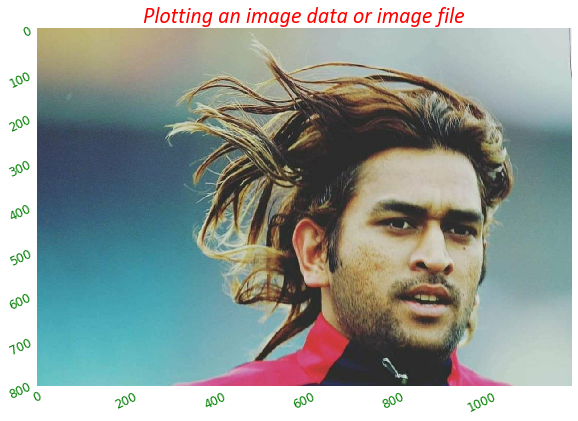

In [13]:
with plt.style.context('seaborn-dark'):
    plt.figure(figsize=(8,8))
    io.imshow('fav_pics/dhoni4.jpg')
    plt.xticks(rotation=25,size=12,color='g')
    plt.yticks(rotation=25,size=12,color='g')
    plt.title('Plotting an image data or image file',fontdict={'size':22,'color':'red','family':'calibri','style':'italic'})
plt.show()

#### ***Reading_and_Printing_an_image_using_scikit_image***

In [14]:
fav_dhoni_image = io.imread('fav_pics/dhoni4.jpg')

In [15]:
type(fav_dhoni_image)

imageio.core.util.Array

##### ***Dtype of above readed image***

In [16]:
fav_dhoni_image.dtype

dtype('uint8')

##### **uint8 stands for 2^8 = 256 which means 0-255 values. This tells us that every cell of the pixel can have value from 0 to 255.**
- **Mean R, G and B columns in a pixel can have value from 0 to 255. The bigger the number the more will be the involvement of that color.**

In [17]:
print('Max ::',fav_dhoni_image.max(),'\nMin ::', fav_dhoni_image.min())

Max :: 255 
Min :: 0


##### ***Shape of above readed image***

In [18]:
fav_dhoni_image.shape

(803, 1200, 3)

##### ***Size of above readed image(Number of elements in a numpy array)***

In [19]:
fav_dhoni_image.size    ## It is the product of array's dimension in this case it is 803*1200*3

2890800

##### ***Dimension of above readed image***

In [20]:
fav_dhoni_image.ndim

3

##### **Shape (803,1200,3) means that there are 803 blocks of data(mean y axis is from 0 to 803) each having 1200 rows(means x axis is from 0 to 1200) and 3 columns. 3 columns represents the RED, GREEN and BLUE color values.**
- **As, colors are represented by using integers or numbers and the mixture of R,G and B forms other colors.**

##### ***Some operations on image object***

In [21]:
fav_dhoni_image

Array([[[184, 173, 109],
        [184, 173, 109],
        [184, 173, 109],
        ...,
        [238, 242, 243],
        [236, 237, 239],
        [237, 238, 240]],

       [[184, 173, 109],
        [184, 173, 109],
        [184, 173, 109],
        ...,
        [238, 242, 243],
        [236, 237, 239],
        [237, 238, 240]],

       [[184, 173, 107],
        [184, 173, 107],
        [184, 173, 107],
        ...,
        [239, 243, 244],
        [237, 238, 240],
        [237, 238, 240]],

       ...,

       [[100, 194, 194],
        [100, 194, 194],
        [100, 194, 194],
        ...,
        [191, 210, 204],
        [191, 210, 204],
        [191, 210, 204]],

       [[100, 194, 194],
        [100, 194, 194],
        [100, 194, 194],
        ...,
        [191, 210, 204],
        [191, 210, 204],
        [191, 210, 204]],

       [[100, 194, 194],
        [100, 194, 194],
        [100, 194, 194],
        ...,
        [191, 210, 204],
        [191, 210, 204],
        [191, 210, 204]]

In [22]:
fav_dhoni_image[0]

Array([[184, 173, 109],
       [184, 173, 109],
       [184, 173, 109],
       ...,
       [238, 242, 243],
       [236, 237, 239],
       [237, 238, 240]], dtype=uint8)

In [23]:
fav_dhoni_image[0].shape

(1200, 3)

##### ***RGB values on first pixel***

In [24]:
fav_dhoni_image[0][0]   ## [0][0] it means we are looking at y=0 and x=0 pixel

Array([184, 173, 109], dtype=uint8)

##### ***RGB values on second pixel***

In [25]:
fav_dhoni_image[0][1]   ## [0][1] it means we are looking at y=0 and x=1 pixel

Array([184, 173, 109], dtype=uint8)

##### ***RGB values on third pixel***

In [26]:
fav_dhoni_image[0][2]   ## [0][2] it means we are looking at y=0 and x=2 pixel

Array([184, 173, 109], dtype=uint8)

##### ***RGB values on fourth pixel***

In [27]:
fav_dhoni_image[0][3]   ## [0][3] it means we are looking at y=0 and x=3 pixel

Array([184, 173, 109], dtype=uint8)

##### ***RGB values of first 5 pixels***

In [28]:
fav_dhoni_image[0][0:4]   ## [0][2] it means we are looking at y=0 and x from 0 to 3 pixel

Array([[184, 173, 109],
       [184, 173, 109],
       [184, 173, 109],
       [184, 173, 109]], dtype=uint8)

##### ***RGB values of last 5 pixels***

In [29]:
fav_dhoni_image[802][1195:1200]   ## [0][2] it means we are looking at y=802 and x from 1195 to 1199 pixel

Array([[191, 210, 204],
       [191, 210, 204],
       [191, 210, 204],
       [191, 210, 204],
       [191, 210, 204]], dtype=uint8)

##### **``We can also confirm the values of the pixels by cross verifying the same using ImageJ tool.``**

In [30]:
fav_dhoni_image[23][7]

Array([180, 167, 114], dtype=uint8)

#### ***Manipulating_image***

#### **``Converting_Image_to_Float``**

In [31]:
fav_dhoni_image_flt = skimage.img_as_float(fav_dhoni_image)

print('Max ::',fav_dhoni_image_flt.max(),'\nMin ::',fav_dhoni_image_flt.min())

Max :: 1.0 
Min :: 0.0


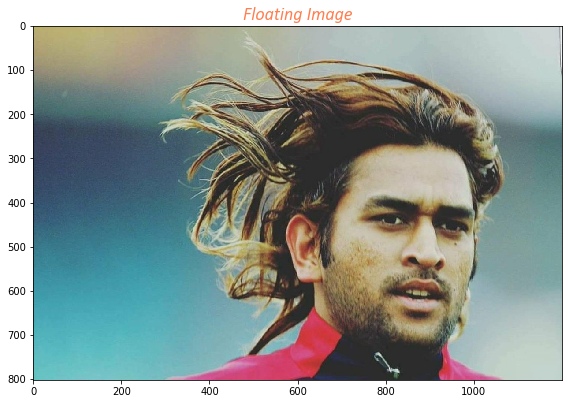

In [32]:
plt.figure(figsize=(8,8))
plt.title('Floating Image',fontdict={'size':18,'family':'calibri','color':'coral','style':'italic'})
io.imshow(fav_dhoni_image_flt)

#### **``Converting_Image_to_Float64``**

In [33]:
fav_dhoni_image_flt64 = skimage.img_as_float64(fav_dhoni_image)

print('Max ::',fav_dhoni_image_flt64.max(),'\nMin ::',fav_dhoni_image_flt64.min())

Max :: 1.0 
Min :: 0.0


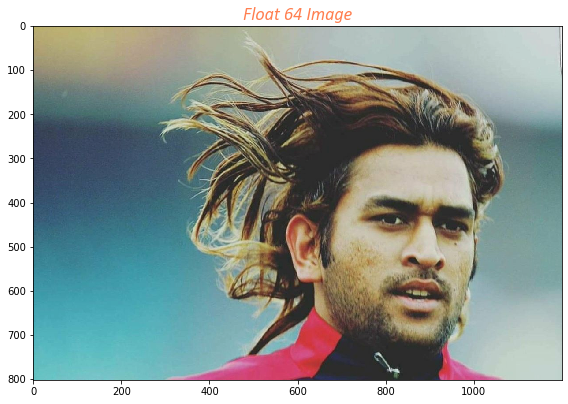

In [34]:
plt.figure(figsize=(8,8))
plt.title('Float 64 Image',fontdict={'size':18,'family':'calibri','color':'coral','style':'italic'})
io.imshow(fav_dhoni_image_flt64)

- **So, the brightness or color intensity difference is quite evident in Float and Float64 image.**

#### **``Reducing_the_float_image_contrast``**

In [35]:
fav_dhoni_image_flt_cntrst_red = fav_dhoni_image_flt*0.5

In [36]:
print('Max ::',fav_dhoni_image_flt_cntrst_red.max(),'\nMin ::',fav_dhoni_image_flt_cntrst_red.min())

Max :: 0.5 
Min :: 0.0


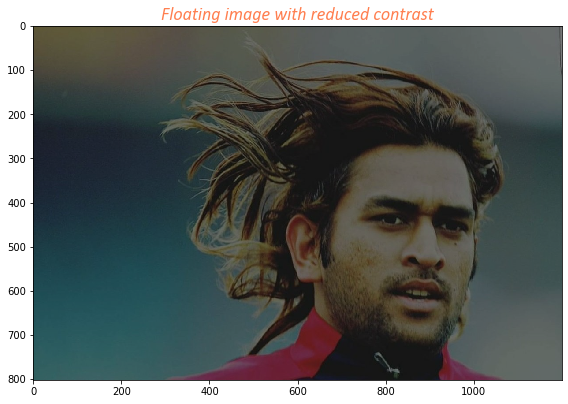

In [37]:
plt.figure(figsize=(8,8))
plt.title('Floating image with reduced contrast',fontdict={'size':18,'family':'calibri','color':'coral','style':'italic'})
io.imshow(fav_dhoni_image_flt_cntrst_red)

#### **``Reducing_the_float64_image_contrast``**

In [38]:
fav_dhoni_image_flt64_cntrst_red = fav_dhoni_image_flt64*0.5

print('Max ::',fav_dhoni_image_flt64_cntrst_red.max(),'\nMin ::',fav_dhoni_image_flt64_cntrst_red.min())

Max :: 0.5 
Min :: 0.0


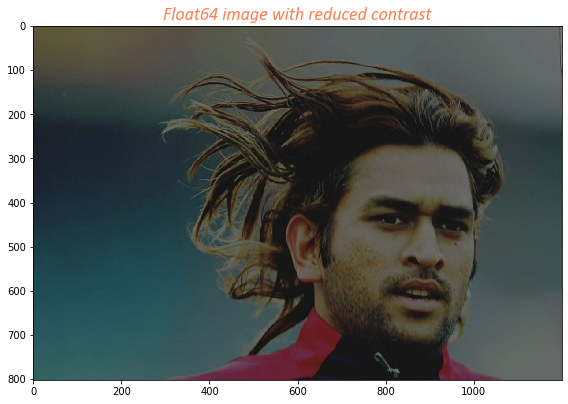

In [39]:
plt.figure(figsize=(8,8))
plt.title('Float64 image with reduced contrast',fontdict={'size':18,'family':'calibri','color':'coral','style':'italic'})
io.imshow(fav_dhoni_image_flt64_cntrst_red)

- **Again, the slight difference in the brightness or color intensity is quite evident in contrast reduced Float and Float64 image.**

#### **``Adding_Random_numbers_in_float_image``**

In [40]:
fav_dhoni_image_flt64.shape

(803, 1200, 3)

In [41]:
fav_dhoni_image_flt64_addition = fav_dhoni_image_flt64 + np.random.random(size=(803,1200,3))
fav_dhoni_image_flt64_addition.shape

(803, 1200, 3)

In [42]:
print('Max ::',fav_dhoni_image_flt64.max(),'\nMin ::',fav_dhoni_image_flt64.min())

Max :: 1.0 
Min :: 0.0


In [43]:
print('Max ::',fav_dhoni_image_flt64_addition.max(),'\nMin ::',fav_dhoni_image_flt64_addition.min())

Max :: 1.9675981381457075 
Min :: 0.03704974529642399


- **Here, if we closely see the data values have actually gone out of desired or expected range [0-1].**

C:\ProgramData\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:78: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  warn("Float image out of standard range; displaying "
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


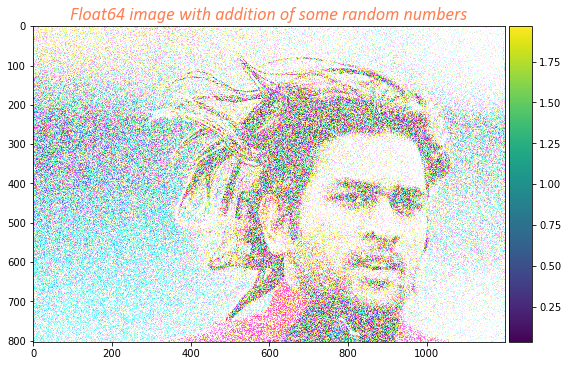

In [44]:
plt.figure(figsize=(8,8))
plt.title('Float64 image with addition of some random numbers',fontdict={'size':18,'family':'calibri','color':'coral','style':'italic'})
io.imshow(fav_dhoni_image_flt64_addition)

- **Here, we added some random numbers to the image array and those were just added as the noise.**

#### **``Adding_Random_numbers_in_uint_image``**

In [45]:
fav_dhoni_image_addition = fav_dhoni_image + np.random.randint(low=0,high=255,size=(803,1200,3),dtype=np.int)
fav_dhoni_image_addition.shape

(803, 1200, 3)

In [46]:
print('Max ::',fav_dhoni_image_addition.max(),'\nMin ::',fav_dhoni_image_addition.min())

Max :: 502 
Min :: 5


- **Here, if we closely see the data values have actually gone out of desired or expected range [0-255].**

C:\ProgramData\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:75: UserWarning: Low image data range; displaying image with stretched contrast.
  warn("Low image data range; displaying image with "
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


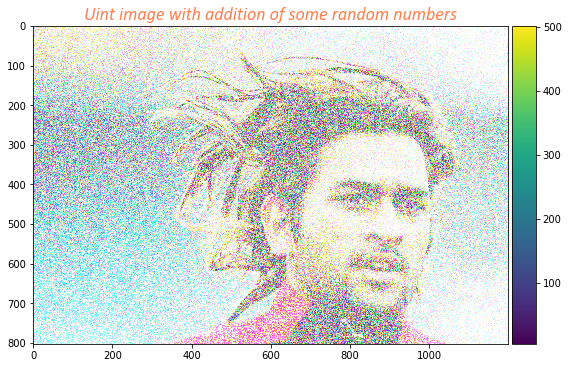

In [47]:
plt.figure(figsize=(8,8))
plt.title('Uint image with addition of some random numbers',fontdict={'size':18,'family':'calibri','color':'coral','style':'italic'})
io.imshow(fav_dhoni_image_addition)

- **Here, we added some random numbers to the image array and those were just added as the noise.**

#### **``Replace_image_area_with_solid_box_color``**

In [48]:
fav_dhoni_image_addition[0:100,0:200,:] = [255,0,0]
fav_dhoni_image_addition[100:200,200:400,:] = [0,255,0]
fav_dhoni_image_addition[200:300,400:600,:] = [0,0,255]
fav_dhoni_image_addition[700:803,1000:1200,:] = [0,255,255]
fav_dhoni_image_addition[600:700,800:1000,:] = [255,0,255]
fav_dhoni_image_addition[500:600,600:800,:] = [255,255,255]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


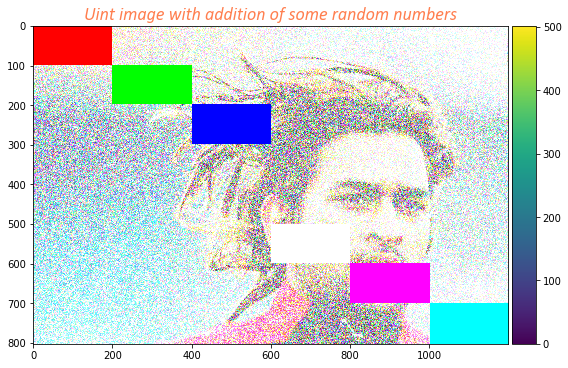

In [49]:
plt.figure(figsize=(8,8))
plt.title('Uint image with addition of some random numbers',fontdict={'size':18,'family':'calibri','color':'coral','style':'italic'})
io.imshow(fav_dhoni_image_addition)

#### **``Plot_Subportion_or_subsample_of_an_image``**

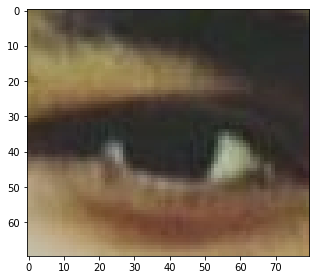

In [50]:
io.imshow(fav_dhoni_image_flt64[400:470,770:850,:])

- **Above image is in Jpeg format and such images works on the principle of Lossy Compression thus the image gets blurred when we try to focus on subportion of it.**

#### **``Flatten_the_image_to_view_the_pixels``**

In [51]:
fav_dhoni_image_flattened = pd.DataFrame(fav_dhoni_image.flatten())

In [52]:
fav_dhoni_image_flattened[0:104000].to_excel('fav_pics/dhoni4_flattened_excel.xlsx')  ## Limiting the number od records as per excel size limit

In [53]:
fav_dhoni_image_flattened.head(10)

,0
0,184
1,173
2,109
3,184
4,173
5,109
6,184
7,173
8,109
9,184


#### **``Storing_the_RGB_values_of_every_pixel_into_DataFrame``**

In [54]:
fav_dhoni_image.shape

(803, 1200, 3)

In [55]:
fav_dhoni_image.shape[0] * fav_dhoni_image.shape[1]   ## Total number of pixels in the image i.e. Total number of rows that will appear in the DataFrame

963600

In [56]:
pixels_rgb_values = pd.DataFrame(fav_dhoni_image[0:1,0:1,:][0])
pixels_rgb_values

,0,1,2
0,184,173,109


In [57]:
for i in range(fav_dhoni_image.shape[0]):
    pixels_rgb_values = pixels_rgb_values.append(pd.DataFrame(fav_dhoni_image[0:804,0:1200,:][i]))

pixels_rgb_values.reset_index(inplace=True,drop=True)
pixels_rgb_values.drop([0],axis=0,inplace=True)
pixels_rgb_values.reset_index(inplace=True,drop=True)
pixels_rgb_values.columns = ['R','G','B']
pixels_rgb_values.head()

,R,G,B
0,184,173,109
1,184,173,109
2,184,173,109
3,184,173,109
4,184,173,109


In [58]:
pixels_rgb_values.shape ## Thus, DataFrame is having RGB values in 3 columns of 963600 pixels

(963600, 3)

In [59]:
# pixels_rgb_values.to_excel('fav_pics/dhoni4_pixels_RGB_values.xlsx') ## Uncomment this line to export the DataFrame into a excel file

#### ***Topics to be studied***

In [60]:
## Other img_as functions in Skimage
## Reading images from all the packages like Pillow ,Skimage ,Matplotlib, CV
## PIL Image processing